In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import librosa
import librosa.display
import IPython.display as ipd
from itertools import cycle
from tqdm import tqdm

# Loading and manipulating audio data


In [ ]:
audio_data = pd.read_json('/content/drive/MyDrive/Kaggle/Bird_CLEF2024/audio_data.json')
meta_data=pd.read_csv('/content/drive/MyDrive/Kaggle/Bird_CLEF2024/train_metadata.csv')

In [12]:
audio_data['duration_per_sample']=1/audio_data['sample_rate']
audio_data['total_duration']=audio_data['audio_signal'].apply(lambda x: len(x)*0.000045)
audio_data.set_index('bird_species',inplace=True)

In [44]:
audio_data

,audio_signal,sample_rate,duration_per_sample,total_duration
bird_species,,,,
asbfly,"[1.1239e-06, -3.573e-07, -2.4089e-06, 4.2735e-...",22050,0.000045,27.138285
ashdro1,"[-5.3512000000000005e-06, -1.4844300000000001e...",22050,0.000045,59.382765
ashpri1,"[-3.243e-07, 1.5030000000000002e-07, 1.6685e-0...",22050,0.000045,25.142445
ashwoo2,"[-1.83616e-05, 6.191e-07, -9.752800000000001e-...",22050,0.000045,49.870125
asikoe2,"[8.736e-07, 1.3690000000000001e-06, 1.4408e-06...",22050,0.000045,22.213440
...,...,...,...,...
woosan,"[2.1520000000000003e-06, -2.0713e-06, 2.8441e-...",22050,0.000045,25.842285
wynlau1,"[-2.3569000000000003e-06, -7.584e-07, 1.5648e-...",22050,0.000045,102.461760
yebbab1,"[5.9283000000000005e-06, 1.6579100000000002e-0...",22050,0.000045,9.979245


#Audio signal visualization

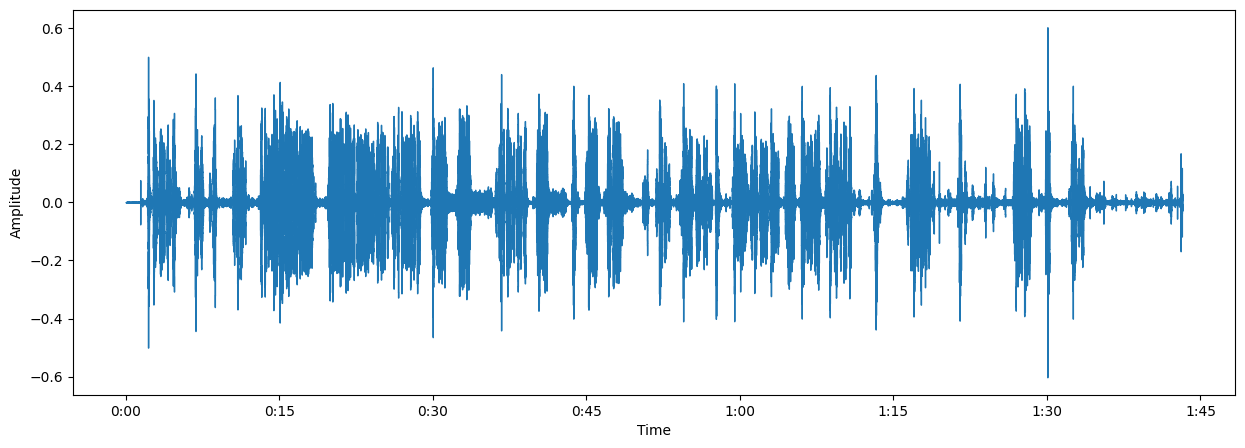

In [58]:
species='wynlau1'
sound = np.array(audio_data.loc[species]['audio_signal'])
plt.figure(figsize=(15,5))
librosa.display.waveshow(sound)
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()

# Amplitude envelope

In [49]:
# function for calculating amplitude envelop
def amplitude_envelop(audio_signal, frame_size, hop_length):
  return np.array([max(audio_signal[i:i+frame_size]) for i in range(0, len(audio_signal), hop_length)])

In [54]:
# visualizing the amplitude envelop
frame_size=1024
hop_length=512
am_envelop = amplitude_envelop(sound, frame_size, hop_length)

frames = range(len(am_envelop))
t = librosa.frames_to_time(frames, hop_length=hop_length)



array([0.00000000e+00, 2.32199546e-02, 4.64399093e-02, ...,
       1.03212698e+02, 1.03235918e+02, 1.03259138e+02])

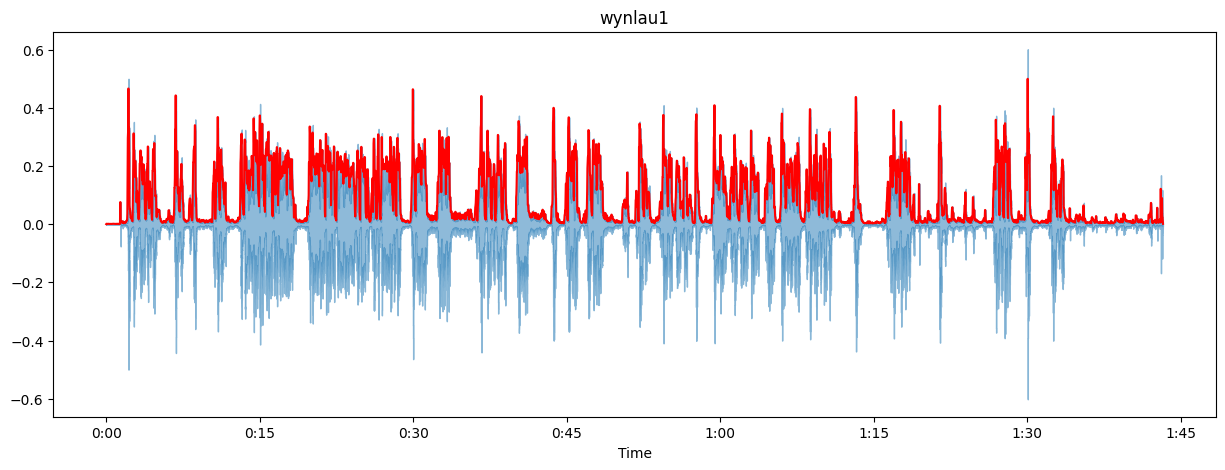

In [59]:
plt.figure(figsize=(15,5))
librosa.display.waveshow(sound, alpha=0.5)
plt.plot(t, am_envelop,color='r')
plt.title(species)
plt.show()